In [2]:
# Neural Net from Scratch; uses a relu function
import networkx as nx
import matplotlib.pyplot as plt
from statistics import mean

def relu(x):
'''The activation function computed by each neuron'''
    if x<0:
        return 0
    else:
        return x

def relu_der(x):
'''The derivative of the activation function; used to calculate gradient in gradient descent'''
    if x<=0:
        return 0
    else:
        return 1

class Neural_Net:
    """
    Stores the structure of the neurons and connections, and useful methods for training and acessing outputs. 
    
    This class contains the methods for training the net, accessing outputs for a given input, adding neurons and
    connections between neurons, and displaying the net using networkx.
    
    All neurons are stored in an array which represents a layer in the neural net. All layers are stored in the self.nodes array. 
    Thus, neurons are stored in an array of arrays. The connections between neurons, are stored in the connections class, and the
    self.connections array contains all of the connections between neurons. 
    

    
    """
    def __init__(self):
        self.nodes = [] #list of list of lists where the first index is the layer and second is node in that layer
        self.graph = nx.Graph() #nx graph object used to plot the net
        self.connections = [] 
        self.num_links = 0 #keeps track of number of neuron connections
        
    def __repr__(self):
        ''' Used to show the neuron activation values when graphing the net'''
        return str(self.value)
    
    def add_neuron(self,  new_neuron, layer):
        '''
        Adds a neuron to a specified layer by modifying self.nodes and self.graph
        
        Parameters
        ----------
        new_neuron : Neuron
            Neuron to be added
        layer : int
            Index, starting from 0, of the layer to add the neuron
        
        '''#adds a new neuron at layer (index starting from 0)
        if len(self.nodes)>= layer+1:
            self.nodes[layer].append(new_neuron)
        else:
            self.nodes.append([new_neuron])
        self.graph.add_node(new_neuron)
    
    def add_connection(self, left_neuron, right_neuron): #connectivity between left and right neurons
        '''
        Creates a connection instance and adds it to self.connections
        
        
        Parameters
        ----------
        left_neuron : Neuron
            Neuron to the left of the connection
        right_neuron : Neuron
            Neuron to the right of the connection
        '''
        weight = randn() #randomly initialize a weight
        new_connection = connection(left_neuron, right_neuron, weight) #initialize a new connection
        left_neuron.right_connections.append(new_connection)
        right_neuron.left_connections.append(new_connection)
        self.connections.append(new_connection)
        self.graph.add_edge(left_neuron, right_neuron) #add graph for displaying network
    
    #gets the neuron at self, layer, and index
    def get_neuron(self, layer, index): 
        '''
        Returns a neuron at a specified layer and index within a layer
        
        Parameters
        ----------
        layer : int
            Index, starting from 0, of the layer within the net
        index: int
            Index, starting from 0, of the neuron within within the layer
        '''
        return self.nodes[layer][index]
    

    def get_layer(self, layer):
        '''
        Returns layer at a given layer index
        '''
        return self.nodes[layer]

    def plot_net(self):
        """
        Plots the net using Networkx
        
        Connection weights, neuron activation, and connections between neurons are plotted
        """
        pos = nx.spectral_layout(self.graph)
        labels = {(connection.left_neuron, connection.right_neuron):'{0:.2f}'.format(connection.weight) for connection in self.connections}
        nx.draw(self.graph, pos, with_labels=True)
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=labels)
        plt.show()

    
    #update the gradient for a single training example. 
    def calculate_gradient(self, training_input, training_output): #cost function to update gradients. Gradient
        '''
        Computes the gradient for a given training_input and output
        
        Parameters
        ----------
        layer : int
            Index, starting from 0, of the layer within the net
        index: int
            Index, starting from 0, of the neuron within within the layer
        '''
        self.calculate(training_input) #calculate activations and store in each neuron
        for index, output_node in enumerate(self.nodes[-1]): #iterate through output nodes and apply training outputs
            output_node.training_value = training_output[index]
        for layer in reversed(self.nodes):  #iterate backwards through layers and update gradients
            for node in layer:
                node.calculate_gradient_term() #calculate cost function gradient wrt neuron bias
                for node_connection in node.left_connections:
                    node_connection.calculate_gradient_term() #calculate cost function gradient wrt connection weight
        return
                
    def calculate(self, input_vector): #applies weights and biases throughout the neural net for a given input
        '''
        Calculates the outputs of the neural net given some inputs
        
        Stores the outputs in the output neurons
        Parameters
        ----------
        input_vector : array
            Vector of inputs to the neural net. Must have length equal to the number of input neurons. 
        '''
        
        for node_index, node in enumerate(self.nodes[0]):  #update input nodes using given input
            node.compute(input_vector[node_index])
        for layer in self.nodes[1:]: #update the rest of the nodes from left to right
            for node in layer:
                node.compute()
    
    def subtract_gradient(self, alpha):
        '''
        Updates the neural net paramaters through subtracting the calculated gradient
        
        This method must be called after the gradient is calculated and stored in each component using the
        net.calculate_gradient method. 
        Parameters
        ----------
        alpha : float
            The learning rate used for gradient descent 
        '''
        #iterate through nodes and update the nodes
        for layer in self.nodes:
            for node in layer:
                node.gradient_term = mean(node.gradient_set)
                node.bias -= alpha*node.gradient_term
                node.gradient_set = []
                
        for connection in self.connections:
            connection.gradient_term = mean(connection.gradient_set)
            connection.weight -= alpha*connection.gradient_term
            connection.gradient_set = []
                
        return

    #trains a neural net for given inputs and outputs
    #each training set is assumed to be a row of numpy array n iterations to meet 
    def train(self, training_inputs, training_outputs, iterations):
        '''
        Trains the net given some training inputs and outputs. 
        
        Parameters
        ----------
        training_inputs : matrix
            A matrix consisting of all of the input values to be trained on. The columns feed into each training example, and 
            the rows feed into each input neuron
        training_outputs : matrix
            A matrix consisting of all of the output values to be trained on. The columns feed into each training example, and 
            the rows feed into each output neuron
        iterations : int
            the number of iterations to apply the gradient descent process to
        '''
            
        for i in range(iterations):
            for index, training_input in enumerate(training_inputs):
                training_output = training_outputs[index]
                self.calculate_gradient(training_input, training_output)

            self.subtract_gradient(.001)

        
class Neuron: 
    """
    Used by Neural_Net class to emulate Neurons in a neural net.  
    
    This class contains the methods for calculating the outputs of an activation function, displaying the activation, and
    calculating gradients

    
    """
    def __init__(self, Neural_net, layer, name): #appends a neuron to a neural net
        Neural_net.add_neuron(self, layer)
        Neural_net.graph.add_node(self)
        self.bias = 0
        self.name = name
        self.activation= 1
        self.left_connections = [] #all connections to neurons to the left
        self.right_connections = [] #all connections to neurons to the right
        self.z = 1 #last value before applying the activation function; used for derivatives
        self.gradient_term = 0 #list of terms for each gradient term, corresponding to a training example
        self.gradient_set = [] #set of gradients already calculated in the tra ining set
        
    def __repr__(self):
        activation_str = '{0:.2f}'.format(self.activation)
        return self.name + ":" + activation_str
    
    #compute output of neuron using bias and weight
    def compute(self):
        left_sum = 0 #increment sum
        #sum up all contributions from left nodes
        for left_connection in self.left_connections:
            left_node = left_connection.left_neuron
            weight = left_connection.weight
            left_sum += left_node.activation*weight
        
        #z is the input before, used for calcualating the deravitive of activation function
        self.z = left_sum + self.bias
        #apply activation function
        self.activation = relu(left_sum)
    
    #calculate gradient term for the bias associated with the node
    def calculate_gradient_term(self):
        grad_term = 0
        if type(self) == OutputNeuron:
            self.gradient_term = 2*( self.activation - self.training_value)
        else:
            for right_connection in self.right_connections:
                grad_term += right_connection.gradient_term/self.activation #get rid of the self.activation because you diffirientate it away
            sigma_prime = relu_der(self.z)
            self.gradient_term = grad_term* sigma_prime
            
        self.gradient_set.append(self.gradient_term)
        
class OutputNeuron(Neuron):
    def __init__(self, NeuralNet, layer, name):
        super().__init__(NeuralNet, layer, name)
        self.training_value = 0

class InputNeuron(Neuron):
    def __init__(self, NeuralNet, name):
        super().__init__(NeuralNet, 0, name)
        self.activation = 1
    
    def compute(self, training_input):
        self.z = training_input
        self.activation = relu(training_input)

class connection: 
    def __init__(self, left_neuron, right_neuron, weight):
        self.left_neuron = left_neuron
        self.right_neuron = right_neuron
        self.weight = weight
        self.gradient_term = 0 #term currently being updated
        self.gradient_set = [] #set of gradients already calculated in the training set
    
    def calculate_gradient_term(self):
        right_node = self.right_neuron
        left_node = self.left_neuron
        if type(right_node) == OutputNeuron:#means we are at the root node
            sigma_prime = relu_der(right_node.z)
            grad_term = left_node.activation*sigma_prime*2*(right_node.activation-right_node.training_value)
            self.gradient_term = grad_term
        else: 
            grad_term = 0
            sigma_prime = relu_der(right_node.z)
            for right_connection in right_node.right_connections:
                grad_term += right_connection.weight
            self.gradient_term = grad_term*left_node.activation*sigma_prime/right_node.activation
        
        self.gradient_set.append(self.gradient_term)
    
   

IndentationError: expected an indented block (<ipython-input-2-7923cf2065c4>, line 7)

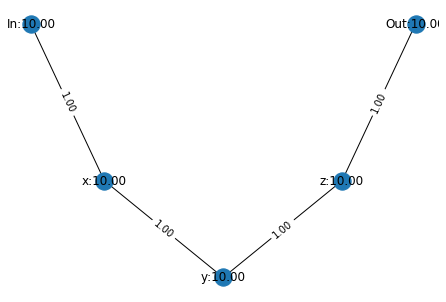

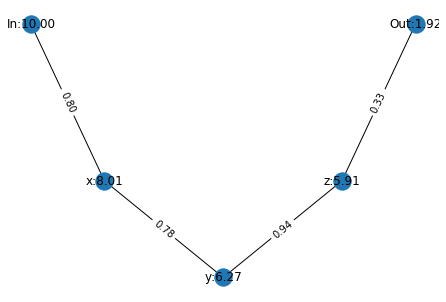

In [50]:
main_net = Neural_Net()
innode = InputNeuron(main_net, "In")
#a = InputNeuron(main_net, "A")
x = Neuron(main_net, 1, "x")
y  = Neuron(main_net, 2, "y")
#w= Neuron(main_net, 2, "w")
z = Neuron(main_net, 3, "z")
outnode = OutputNeuron(main_net, 4, "Out")

main_net.add_connection(innode,x)
main_net.add_connection(x,y)
main_net.add_connection(y, z)
main_net.add_connection(z, outnode)
#main_net.add_connection(x,w)
#main_net.add_connection(w,z)



main_net.calculate([10])
main_net.plot_net()
main_net.train([[10]], [[2]],  200)
main_net.calculate([10])
main_net.plot_net()


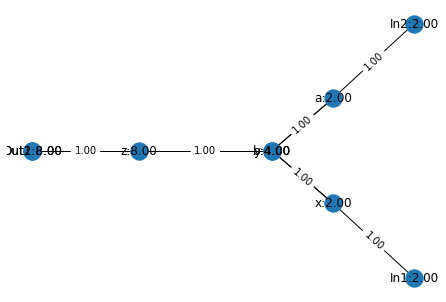

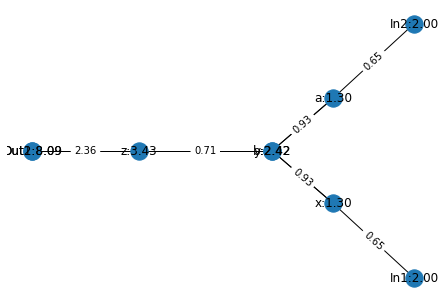

In [47]:
main_net = Neural_Net()
innode1 = InputNeuron(main_net, "In1")
innode2 = InputNeuron(main_net, "In2")

#a = InputNeuron(main_net, "A")
x = Neuron(main_net, 1, "x")
y  = Neuron(main_net, 2, "y")
#w= Neuron(main_net, 2, "w")
z = Neuron(main_net, 3, "z")
a= Neuron(main_net, 1, "a")
b = Neuron(main_net, 2, "b")

outnode1 = OutputNeuron(main_net, 4, "Out1")
outnode2 = OutputNeuron(main_net, 4, "Out2")

main_net.add_connection(innode1,x)
main_net.add_connection(innode2,a)

main_net.add_connection(x,y)
main_net.add_connection(x,b)
main_net.add_connection(y, z)
main_net.add_connection(a,b)
main_net.add_connection(a,y)
main_net.add_connection(b, z)

main_net.add_connection(z, outnode1)
main_net.add_connection(z, outnode2)
#main_net.add_connection(x,w)
#main_net.add_connection(w,z)
main_net.calculate([2,2])
main_net.plot_net()
main_net.train([[2,2]], [[10,10]],  150)
main_net.calculate([2,2])
main_net.plot_net()
